------------- Initialization and postprocessing ----------------
------------- Start diffusion modeling ----------------
------------- Diffusion modeling took 0.2542067 seconds ----------------
------------- Initialization and postprocessing took 0.0043342 seconds----------------


(0.0, 1.0)

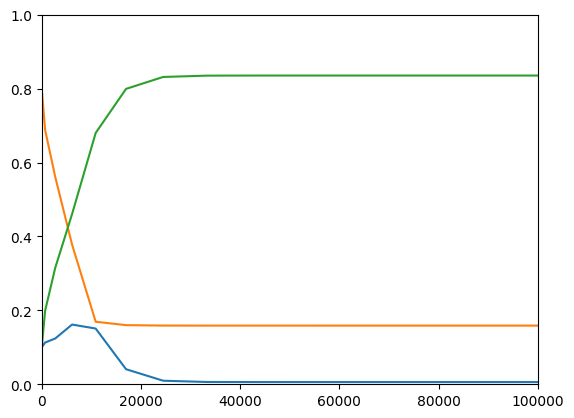

In [1]:
import numpy as np
from diffusionpy import Diffusion_MS,vpure,dlnai_dlnxi,D_Matrix,Diffusion_MS_iter,origin_like,lngi,time_dep_surface,dlnai_dlnxi_loop,DIdeal2DReal,Gammaij
import matplotlib.pyplot as plt
T=303.15
p=1E5
nc=4 # number of components
L=0.0185 # estimated thickness of the film

Dvec=np.asarray([1.00E-06,5.52E-9,5.52E-9,3.42E-08,3.42E-08,1.00E-21])/10
mobile=np.asarray([True,True,False,False])
wi0=np.asarray([0.100001667,0.799998333,0.03,0.07])
wi8=np.asarray([0.005951831,0.158725973,0.250596659,0.584725537])
taui=np.asarray([35711.02587,14926.92374])

kijvec=np.asarray([-0.045000,-0.022000,-0.128000,-0.001000,0.002673,-0.062100])
kijHBvec=np.asarray([0,0,0,0,-0.455211419,0])
Mi=np.asarray([18.015,46.069,357.79,65000.])
mi=np.asarray([1.2047,2.3827,14.283,2420.99])
sigi=np.asarray([2.79533,3.1771,3.535,2.947])
ui=np.asarray([353.95,198.24,262.791,205.27])
epsAiBi=np.asarray([2425.7,2653.4,886.4,0.])
kAiBi=np.asarray([0.045099,0.032384,0.02,0.02])
Na=np.asarray([1.,1.,3.,653.])
vpures=vpure(p,T,mi,sigi,ui,epsAiBi,kAiBi,Na)
t=np.asarray([0,3.660e+03, 7.260e+03, 1.098e+04, 1.446e+04, 1.794e+04, 1.986e+04,
       2.400e+04, 2.760e+04, 3.090e+04, 3.450e+04, 9.180e+04, 1.700e+06])
t=np.linspace(t[0],t[-1]**0.5,51)**2
D=D_Matrix(Dvec,nc)
kij=D_Matrix(kijvec,nc)
kijHB=D_Matrix(kijHBvec,nc)
par={"mi":mi,
"si": sigi,
"ui" :ui,
"eAi" :epsAiBi,
"kAi":kAiBi,
"NAi":Na,
"Mi": Mi,
"kij":kij,
"kijA":kijHB,
"vpure":vpures}
mobiles=np.where(mobile)[0]
# dlnai_dlnwi_fun=lambda wi: massbalancecorrection(dlnai_dlnxi_loop(T,np.ascontiguousarray(wi),**par)*wi[:,:,:,None],wi,wi0,Mi,mobile)
dlnai_dlnwi_fun=lambda wi: Gammaij(T,wi,par)
witB=time_dep_surface(t,wi0,wi8,mobile,taui)

import matplotlib.pyplot as plt
wtid,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec,wi0,wi8,Mi,mobile,swelling=True,full_output=True)
plt.plot(t,wtid[:,0])
plt.plot(t,wtid[:,1])
plt.plot(t,wtid[:,2]+wtid[:,3])

plt.xlim([0,100000])
plt.ylim([0,1])

In [4]:
# Dvec=np.asarray([1.00E-06,5.52E-11,5.52E-11,7.42E-7,7.42E-7,1.00E-21]) still problematic
Dvec2=np.asarray([1.00E-06,5.52E-10,5.52E-10,7.42E-7,7.42E-7,1.00E-21])
taui=np.asarray([15711.02587,14926.92374])
# dlnai_dlnwi_fun2=lambda wi: dlnai_dlnxi(T,np.ascontiguousarray(wi),**par)#*wi[None,:]
wave=(wi0+wi8)/2
# wave=np.average(wt,axis=0)
# wave=np.average(np.sum(wtz*np.gradient(t)[:,None,None],axis=0)/t[-1],axis=1)
# wave=wave/np.sum(wave)
Dvec2=DIdeal2DReal(Dvec,wave,wi0,dlnai_dlnwi_fun(wave),mobile,Mi)
witB=time_dep_surface(t,wi0,wi8,mobile,taui)
wt,wtz,zvec,Lt=Diffusion_MS_iter(t,L,Dvec2,wi0,wi8,Mi,mobile,swelling=True,full_output=True,dlnai_dlnwi_fun=dlnai_dlnwi_fun,method="weg",maxit=9)
# wave=np.average(wtid,axis=0)
wtave,wtz,zvec,Lt=Diffusion_MS(t,L,Dvec2,wi0,wi8,Mi,mobile,full_output=True,dlnai_dlnwi=dlnai_dlnwi_fun(wave))
wave=np.average(wtid,axis=0)
plt.plot(t,wt[:,0])
plt.plot(t,wt[:,1])
plt.plot(t,wt[:,2]+wt[:,3])
plt.plot(t,wtid[:,0],"k--")
plt.plot(t,wtid[:,1],"k--")
plt.plot(t,wtid[:,2]+wtid[:,3],"k--")
plt.plot(t,wtave[:,0],"m--")
plt.plot(t,wtave[:,1],"m--")
plt.plot(t,wtave[:,2]+wtave[:,3],"m--")
plt.xlim([0,100000])
plt.ylim([0,1])
# plt.plot(zvec,wtz[10,0,:])
# plt.plot(zvec,wtz[10,1,:])
# plt.plot(zvec,wtz[10,2,:])
# plt.plot(zvec,wtz[10,3,:])

# plt.plot(zvec,wtz[20,0,:])
# plt.plot(zvec,wtz[20,1,:])
# plt.plot(zvec,wtz[20,2,:])
# plt.plot(zvec,wtz[20,3,:])

# plt.plot(zvec,wtz[40,0,:])
# plt.plot(zvec,wtz[40,1,:])
# plt.plot(zvec,wtz[40,2,:])
# plt.plot(zvec,wtz[40,3,:])

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (1171426454.py, line 22)